<a href="https://colab.research.google.com/github/Davron030901/OpenCv/blob/main/ImageCrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/dog.jpeg

--2025-04-24 02:27:24--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/dog.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5515 (5.4K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>]   5.39K  --.-KB/s    in 0s      

2025-04-24 02:27:24 (64.9 MB/s) - ‘dog.jpeg’ saved [5515/5515]



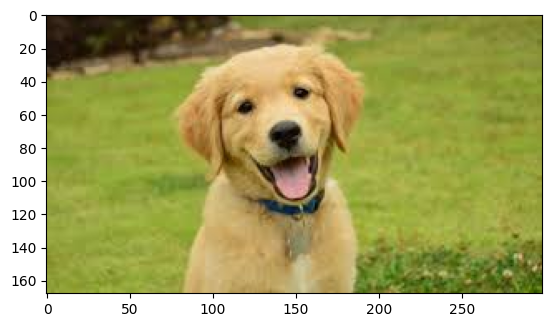

In [ ]:
img=Image.open("/content/dog.jpeg")
plt.imshow(img)

In [ ]:
print(img.size)

(299, 168)


In [ ]:
resize=T.Resize((200,300))
resize_img=resize(img)
print(resize_img.size)

(300, 200)


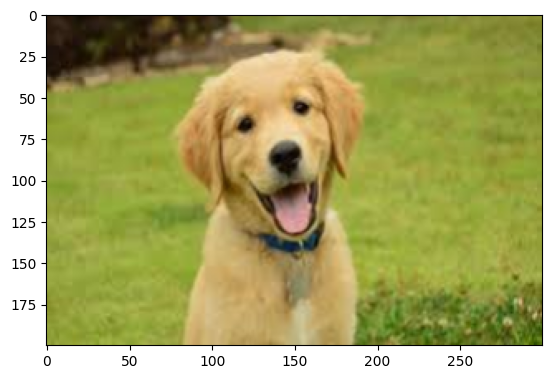

In [ ]:
plt.imshow(resize_img)

In [ ]:
pad=T.Pad(20)
pad_img=pad(img)
print(pad_img.size)

(339, 208)


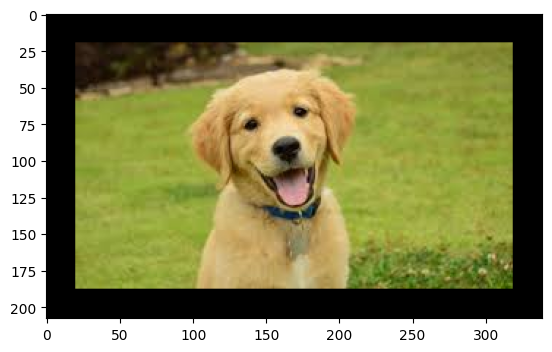

In [ ]:
plt.imshow(pad_img)

In [ ]:
ccrop=T.CenterCrop(150)
center_img=ccrop(img)
print(center_img.size)

(150, 150)


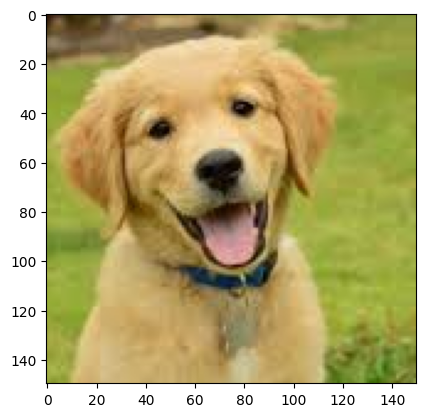

In [ ]:
plt.imshow(center_img)

In [ ]:
fcrop=T.FiveCrop(100)
f_img=fcrop(img)
print(type(f_img))
print(  f_img[0].size)
print(len(f_img))

<class 'tuple'>
(100, 100)
5


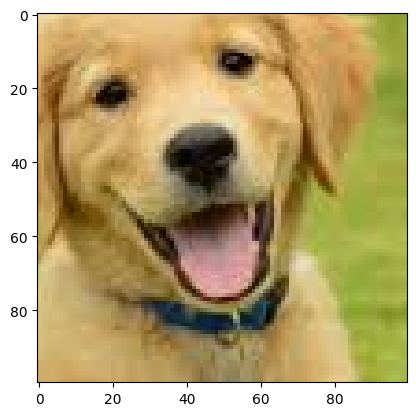

In [ ]:
plt.imshow(f_img[4])

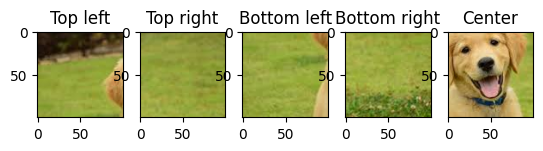

In [ ]:
fig,ax=plt.subplots(1,5)
for i in range(5):
  ax[i%5].imshow(f_img[i])
  if i==0:
    ax[i%5].set_title("Top left")
  if i==1:
    ax[i%5].set_title("Top right")
  if i==2:
    ax[i%5].set_title("Bottom left")
  if i==3:
    ax[i%5].set_title("Bottom right")
  if i==4:
    ax[i%5].set_title("Center")

In [ ]:
gray=T.Grayscale(num_output_channels=1)
gray_img=gray(img)
print(gray_img.size)

(299, 168)


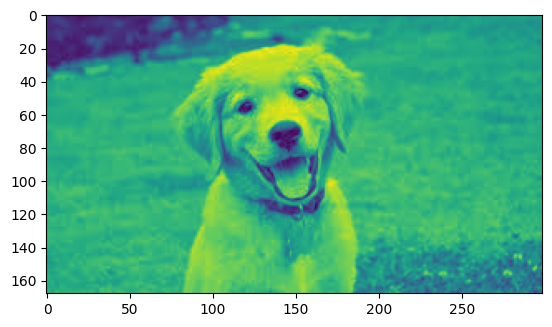

In [ ]:
plt.imshow(gray_img)

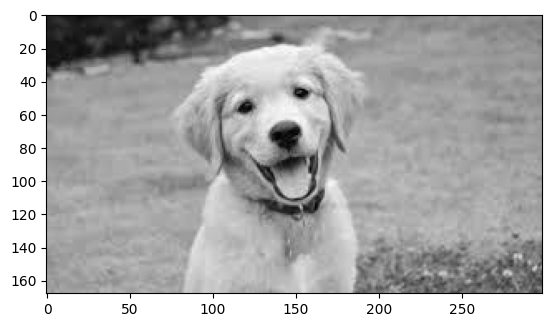

In [ ]:
plt.imshow(gray_img,cmap="gray")

In [ ]:
resize=T.Resize(200)
ccrop=T.CenterCrop(150)
transform=T.Compose([ccrop,resize])
transform_img=transform(img)
print(transform_img.size)

(200, 200)


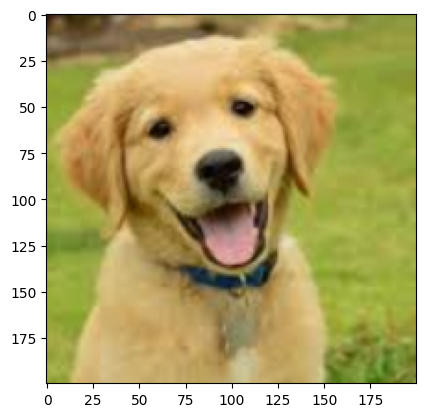

In [ ]:
plt.imshow(transform_img)

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/mnist_png.tar.gz

--2025-04-24 02:30:52--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/mnist_png.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15683414 (15M) [application/octet-stream]
Saving to: ‘mnist_png.tar.gz’

mnist_png.tar.gz    100%[===================>]  14.96M  --.-KB/s    in 0.08s   

2025-04-24 02:30:53 (188 MB/s) - ‘mnist_png.tar.gz’ saved [15683414/15683414]



In [ ]:
!tar -xzf /content/mnist_png.tar.gz

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
from torch.utils.data import DataLoader,Dataset,random_split
import pathlib

In [ ]:
test_path=pathlib.Path("/content/mnist_png/testing")
train_path=pathlib.Path("/content/mnist_png/training")
imgs=test_path.glob("*/*.png")
print(len(list(imgs)))

10000


In [ ]:
img_list=list(imgs)
print(img_list[:5])

[]


(28, 28)


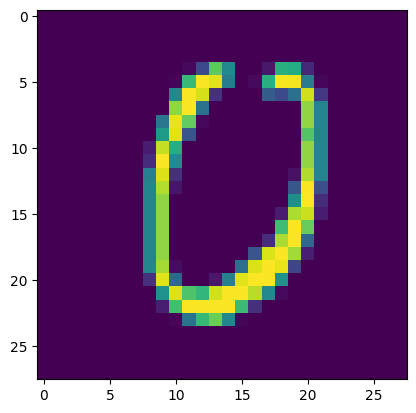

In [ ]:
img=Image.open("/content/mnist_png/testing/0/3185.png")
print(img.size)
plt.imshow(img)

In [ ]:
transform=T.Compose([T.Resize(32),T.ToTensor()])

In [ ]:
imge=transform(img)
print(imge.size())

torch.Size([1, 32, 32])


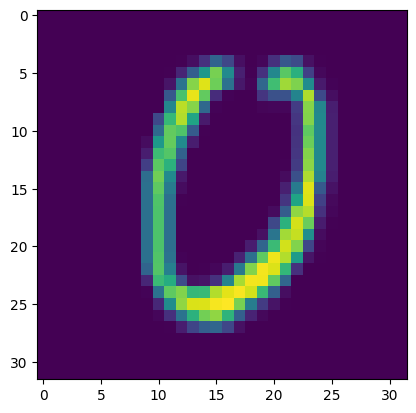

In [ ]:
img=imge.permute(1,2,0)
plt.imshow(img)

In [ ]:
class MNISTDataset(Dataset):
  def __init__(self,path,transform=None):
    # int for cross entryp loss
    self.path_list=list(path.glob("*/*.png"))
    self.transform=transform
  def __len__(self):
    return len(self.path_list)
  def __getitem__(self,idx):
    img=Image.open(self.path_list[idx])
    label=int(self.path_list[idx].parent.name)
    if transform!= None:
      img=transform(img)
    return img,int(label)

In [ ]:
test_dataset=MNISTDataset(test_path,transform)
train_dataset=MNISTDataset(train_path,transform)

In [ ]:
train_data=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_data=DataLoader(test_dataset,batch_size=64,shuffle=True)

In [ ]:
for x,y in test_data:
  print(x.shape)
  print(y)
  break

torch.Size([64, 1, 32, 32])
tensor([6, 9, 4, 7, 9, 7, 2, 4, 3, 7, 4, 0, 0, 0, 9, 3, 2, 8, 9, 1, 9, 8, 0, 5,
        3, 2, 4, 6, 2, 9, 1, 4, 2, 6, 8, 7, 5, 1, 3, 1, 9, 4, 7, 8, 3, 8, 1, 0,
        9, 4, 2, 7, 5, 1, 3, 3, 2, 8, 5, 2, 2, 1, 2, 5])


In [ ]:
from torch import nn
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    # 32X32X1
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6,
                           kernel_size = 5, stride = 1, padding = 0)
    # 28X28X6
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16,
                           kernel_size = 5, stride = 1, padding = 0)
    # 14X14X6
    self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120,
                           kernel_size = 5, stride = 1, padding = 0)
    # 10X10X16

    # AVG POLL 5X5X16

    self.linear1 = nn.Linear(120, 84)
    self.linear2 = nn.Linear(84, 10)
    self.tanh = nn.Tanh()
    self.avgpool = nn.AvgPool2d(kernel_size = 2, stride = 2)

  def forward(self, x):
    # 32X32X1
    x = self.conv1(x)
    x = self.tanh(x)
    # 28X28X6
    x = self.avgpool(x)
    # 14x14x6
    x = self.conv2(x)
    # 10x10x16
    x = self.tanh(x)
    x = self.avgpool(x)
    # 5x5x16
    x = self.conv3(x)
    # 1x1x120

    x = self.tanh(x)

    x = x.reshape(x.shape[0], -1)
    # 120
    x = self.linear1(x)
    # 84
    x = self.tanh(x)
    # 84
    x = self.linear2(x)
    # 10
    return x

In [ ]:
model=LeNet()

In [ ]:
# loss and optimizer
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
print(device)
print(torch.cuda.is_available())

cuda
True


In [ ]:
class Trainer:
    def __init__(self, model,train_dataloader, test_dataloader, criterion, optimizer, epochs=3):
        self.model = model
        self.train_dataloader = train_dataloader
        self.test_dataloader = test_dataloader
        self.criterion = criterion
        self.optimizer = optimizer

        self.epochs = epochs
        self.history = {'loss':[],'acc':[],'val_loss':[],'val_acc':[]}

    def train_loop(self):
        sum_loss = 0
        sum_accuracy = 0
        n = len(self.train_dataloader)
        for i, (data,label) in enumerate(tqdm(self.train_dataloader)):
            data = data.to(device)
            label = label.to(device)
            # prediction model
            output = self.model(data)
            # find loss
            loss = self.criterion(output, label)

            sum_loss += loss.item()
            n_corrects = (output.argmax(axis=1)==label).sum().item()
            sum_accuracy += n_corrects/label.size(0)

            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()


        train_loss = sum_loss/n
        train_accuracy = sum_accuracy/n

        self.history['loss'].append(train_loss)
        self.history['acc'].append(train_accuracy)

        return train_loss, train_accuracy

    def validation_loop(self):
        sum_loss = 0
        sum_accuracy = 0
        n = len(self.test_dataloader)
        for i, (data,label) in enumerate(tqdm(self.test_dataloader)):
            data = data.to(device)
            label = label.to(device)
            # prediction model
            output = self.model(data)
            # find loss
            loss = self.criterion(output, label)
            n_corrects = (output.argmax(axis=1)==label).sum().item()

            sum_loss += loss.item()
            sum_accuracy += n_corrects/label.size(0)

        val_loss = sum_loss/n
        val_accuracy = sum_accuracy/n

        self.history['val_loss'].append(val_loss)
        self.history['val_acc'].append(val_accuracy)

        return val_loss, val_accuracy

    def train(self):
        for epoch in range(self.epochs):
            train_loss, train_acc = self.train_loop()
            val_loss, val_acc = self.validation_loop()
            print()
            print(f'Epoch[{epoch+1}/{self.epochs}] \t train_loss: {train_loss:.5f}, train_acc: {train_acc:.2f} \t val_loss: {val_loss:.5f} \t val_acc: {val_acc:.2}')


In [ ]:
# pip install tqdm
trainer = Trainer(
    model = model.to(device),
    train_dataloader=train_data,
    test_dataloader=test_data,
    criterion=criterion,
    optimizer=optimizer,
    epochs=100,
)

In [ ]:
from tqdm import tqdm
trainer.train()

100%|██████████| 157/157 [00:02<00:00, 54.61it/s]



Epoch[1/100] 	 train_loss: 0.29807, train_acc: 0.91 	 val_loss: 0.12131 	 val_acc: 0.96


100%|██████████| 157/157 [00:02<00:00, 58.11it/s]



Epoch[2/100] 	 train_loss: 0.09453, train_acc: 0.97 	 val_loss: 0.07273 	 val_acc: 0.98


100%|██████████| 157/157 [00:02<00:00, 54.82it/s]



Epoch[3/100] 	 train_loss: 0.06329, train_acc: 0.98 	 val_loss: 0.05047 	 val_acc: 0.98


100%|██████████| 157/157 [00:02<00:00, 58.17it/s]



Epoch[4/100] 	 train_loss: 0.04887, train_acc: 0.98 	 val_loss: 0.04949 	 val_acc: 0.98


100%|██████████| 157/157 [00:03<00:00, 47.92it/s]



Epoch[5/100] 	 train_loss: 0.03846, train_acc: 0.99 	 val_loss: 0.04818 	 val_acc: 0.98


100%|██████████| 157/157 [00:02<00:00, 59.09it/s]



Epoch[6/100] 	 train_loss: 0.03129, train_acc: 0.99 	 val_loss: 0.04712 	 val_acc: 0.98


100%|██████████| 157/157 [00:02<00:00, 59.04it/s]



Epoch[7/100] 	 train_loss: 0.02679, train_acc: 0.99 	 val_loss: 0.04652 	 val_acc: 0.98


100%|██████████| 157/157 [00:02<00:00, 59.62it/s]



Epoch[8/100] 	 train_loss: 0.02185, train_acc: 0.99 	 val_loss: 0.04371 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 49.76it/s]



Epoch[9/100] 	 train_loss: 0.02115, train_acc: 0.99 	 val_loss: 0.04628 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 56.80it/s]



Epoch[10/100] 	 train_loss: 0.01504, train_acc: 0.99 	 val_loss: 0.05091 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.97it/s]



Epoch[11/100] 	 train_loss: 0.01513, train_acc: 1.00 	 val_loss: 0.05078 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.92it/s]



Epoch[12/100] 	 train_loss: 0.01315, train_acc: 1.00 	 val_loss: 0.04607 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 52.82it/s]



Epoch[13/100] 	 train_loss: 0.01143, train_acc: 1.00 	 val_loss: 0.04760 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 53.82it/s]



Epoch[14/100] 	 train_loss: 0.01118, train_acc: 1.00 	 val_loss: 0.04950 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.36it/s]



Epoch[15/100] 	 train_loss: 0.01021, train_acc: 1.00 	 val_loss: 0.05454 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.65it/s]



Epoch[16/100] 	 train_loss: 0.01054, train_acc: 1.00 	 val_loss: 0.04573 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 55.83it/s]



Epoch[17/100] 	 train_loss: 0.00781, train_acc: 1.00 	 val_loss: 0.04706 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 51.59it/s]



Epoch[18/100] 	 train_loss: 0.00734, train_acc: 1.00 	 val_loss: 0.05486 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.89it/s]



Epoch[19/100] 	 train_loss: 0.00650, train_acc: 1.00 	 val_loss: 0.05144 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.14it/s]



Epoch[20/100] 	 train_loss: 0.00738, train_acc: 1.00 	 val_loss: 0.05049 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 57.29it/s]



Epoch[21/100] 	 train_loss: 0.00860, train_acc: 1.00 	 val_loss: 0.05880 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 51.18it/s]



Epoch[22/100] 	 train_loss: 0.00572, train_acc: 1.00 	 val_loss: 0.05169 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.08it/s]



Epoch[23/100] 	 train_loss: 0.00578, train_acc: 1.00 	 val_loss: 0.05379 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.01it/s]



Epoch[24/100] 	 train_loss: 0.00783, train_acc: 1.00 	 val_loss: 0.04711 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 57.41it/s]



Epoch[25/100] 	 train_loss: 0.00229, train_acc: 1.00 	 val_loss: 0.04963 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 53.48it/s]



Epoch[26/100] 	 train_loss: 0.00790, train_acc: 1.00 	 val_loss: 0.05898 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 53.64it/s]



Epoch[27/100] 	 train_loss: 0.00674, train_acc: 1.00 	 val_loss: 0.05726 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.05it/s]



Epoch[28/100] 	 train_loss: 0.00347, train_acc: 1.00 	 val_loss: 0.05431 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.17it/s]



Epoch[29/100] 	 train_loss: 0.00208, train_acc: 1.00 	 val_loss: 0.05871 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.42it/s]



Epoch[30/100] 	 train_loss: 0.00801, train_acc: 1.00 	 val_loss: 0.05713 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 49.03it/s]



Epoch[31/100] 	 train_loss: 0.00508, train_acc: 1.00 	 val_loss: 0.05753 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.83it/s]



Epoch[32/100] 	 train_loss: 0.00486, train_acc: 1.00 	 val_loss: 0.06484 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.09it/s]



Epoch[33/100] 	 train_loss: 0.00486, train_acc: 1.00 	 val_loss: 0.05855 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.71it/s]



Epoch[34/100] 	 train_loss: 0.00475, train_acc: 1.00 	 val_loss: 0.05940 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 48.57it/s]



Epoch[35/100] 	 train_loss: 0.00404, train_acc: 1.00 	 val_loss: 0.05718 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.18it/s]



Epoch[36/100] 	 train_loss: 0.00532, train_acc: 1.00 	 val_loss: 0.05750 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.91it/s]



Epoch[37/100] 	 train_loss: 0.00363, train_acc: 1.00 	 val_loss: 0.06330 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.08it/s]



Epoch[38/100] 	 train_loss: 0.00292, train_acc: 1.00 	 val_loss: 0.06188 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 48.18it/s]



Epoch[39/100] 	 train_loss: 0.00510, train_acc: 1.00 	 val_loss: 0.06444 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.93it/s]



Epoch[40/100] 	 train_loss: 0.00480, train_acc: 1.00 	 val_loss: 0.05413 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.35it/s]



Epoch[41/100] 	 train_loss: 0.00173, train_acc: 1.00 	 val_loss: 0.05446 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.06it/s]



Epoch[42/100] 	 train_loss: 0.00597, train_acc: 1.00 	 val_loss: 0.05465 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 49.44it/s]



Epoch[43/100] 	 train_loss: 0.00345, train_acc: 1.00 	 val_loss: 0.05412 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.79it/s]



Epoch[44/100] 	 train_loss: 0.00269, train_acc: 1.00 	 val_loss: 0.05325 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.69it/s]



Epoch[45/100] 	 train_loss: 0.00323, train_acc: 1.00 	 val_loss: 0.05625 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 57.51it/s]



Epoch[46/100] 	 train_loss: 0.00351, train_acc: 1.00 	 val_loss: 0.06256 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 50.36it/s]



Epoch[47/100] 	 train_loss: 0.00411, train_acc: 1.00 	 val_loss: 0.05803 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.69it/s]



Epoch[48/100] 	 train_loss: 0.00402, train_acc: 1.00 	 val_loss: 0.07034 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.58it/s]



Epoch[49/100] 	 train_loss: 0.00349, train_acc: 1.00 	 val_loss: 0.06161 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 55.67it/s]



Epoch[50/100] 	 train_loss: 0.00225, train_acc: 1.00 	 val_loss: 0.05269 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 53.45it/s]



Epoch[51/100] 	 train_loss: 0.00429, train_acc: 1.00 	 val_loss: 0.06479 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.87it/s]



Epoch[52/100] 	 train_loss: 0.00386, train_acc: 1.00 	 val_loss: 0.06279 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.65it/s]



Epoch[53/100] 	 train_loss: 0.00291, train_acc: 1.00 	 val_loss: 0.05788 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 55.50it/s]



Epoch[54/100] 	 train_loss: 0.00256, train_acc: 1.00 	 val_loss: 0.06029 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 52.72it/s]



Epoch[55/100] 	 train_loss: 0.00357, train_acc: 1.00 	 val_loss: 0.08441 	 val_acc: 0.98


100%|██████████| 157/157 [00:02<00:00, 56.63it/s]



Epoch[56/100] 	 train_loss: 0.00463, train_acc: 1.00 	 val_loss: 0.06762 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.10it/s]



Epoch[57/100] 	 train_loss: 0.00391, train_acc: 1.00 	 val_loss: 0.06065 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.61it/s]



Epoch[58/100] 	 train_loss: 0.00233, train_acc: 1.00 	 val_loss: 0.06354 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 49.18it/s]



Epoch[59/100] 	 train_loss: 0.00298, train_acc: 1.00 	 val_loss: 0.06528 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.28it/s]



Epoch[60/100] 	 train_loss: 0.00360, train_acc: 1.00 	 val_loss: 0.06046 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.19it/s]



Epoch[61/100] 	 train_loss: 0.00342, train_acc: 1.00 	 val_loss: 0.06201 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.51it/s]



Epoch[62/100] 	 train_loss: 0.00326, train_acc: 1.00 	 val_loss: 0.05859 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 48.82it/s]



Epoch[63/100] 	 train_loss: 0.00233, train_acc: 1.00 	 val_loss: 0.05813 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.01it/s]



Epoch[64/100] 	 train_loss: 0.00211, train_acc: 1.00 	 val_loss: 0.05837 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.12it/s]



Epoch[65/100] 	 train_loss: 0.00509, train_acc: 1.00 	 val_loss: 0.06334 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.84it/s]



Epoch[66/100] 	 train_loss: 0.00174, train_acc: 1.00 	 val_loss: 0.05732 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 48.85it/s]



Epoch[67/100] 	 train_loss: 0.00229, train_acc: 1.00 	 val_loss: 0.06682 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.67it/s]



Epoch[68/100] 	 train_loss: 0.00415, train_acc: 1.00 	 val_loss: 0.06109 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.22it/s]



Epoch[69/100] 	 train_loss: 0.00385, train_acc: 1.00 	 val_loss: 0.06995 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.72it/s]



Epoch[70/100] 	 train_loss: 0.00198, train_acc: 1.00 	 val_loss: 0.07368 	 val_acc: 0.98


100%|██████████| 157/157 [00:03<00:00, 50.83it/s]



Epoch[71/100] 	 train_loss: 0.00232, train_acc: 1.00 	 val_loss: 0.06187 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.72it/s]



Epoch[72/100] 	 train_loss: 0.00394, train_acc: 1.00 	 val_loss: 0.07045 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.21it/s]



Epoch[73/100] 	 train_loss: 0.00267, train_acc: 1.00 	 val_loss: 0.06973 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 55.94it/s]



Epoch[74/100] 	 train_loss: 0.00243, train_acc: 1.00 	 val_loss: 0.07059 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 53.64it/s]



Epoch[75/100] 	 train_loss: 0.00290, train_acc: 1.00 	 val_loss: 0.05987 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.87it/s]



Epoch[76/100] 	 train_loss: 0.00234, train_acc: 1.00 	 val_loss: 0.07121 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.10it/s]



Epoch[77/100] 	 train_loss: 0.00293, train_acc: 1.00 	 val_loss: 0.06370 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 53.54it/s]



Epoch[78/100] 	 train_loss: 0.00185, train_acc: 1.00 	 val_loss: 0.06276 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 55.61it/s]



Epoch[79/100] 	 train_loss: 0.00219, train_acc: 1.00 	 val_loss: 0.06781 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.19it/s]



Epoch[80/100] 	 train_loss: 0.00446, train_acc: 1.00 	 val_loss: 0.06199 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.10it/s]



Epoch[81/100] 	 train_loss: 0.00207, train_acc: 1.00 	 val_loss: 0.06177 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 51.45it/s]



Epoch[82/100] 	 train_loss: 0.00135, train_acc: 1.00 	 val_loss: 0.06225 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 57.73it/s]



Epoch[83/100] 	 train_loss: 0.00308, train_acc: 1.00 	 val_loss: 0.06293 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.83it/s]



Epoch[84/100] 	 train_loss: 0.00380, train_acc: 1.00 	 val_loss: 0.07085 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.80it/s]



Epoch[85/100] 	 train_loss: 0.00213, train_acc: 1.00 	 val_loss: 0.06825 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 50.03it/s]



Epoch[86/100] 	 train_loss: 0.00144, train_acc: 1.00 	 val_loss: 0.06982 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.20it/s]



Epoch[87/100] 	 train_loss: 0.00423, train_acc: 1.00 	 val_loss: 0.07359 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.63it/s]



Epoch[88/100] 	 train_loss: 0.00301, train_acc: 1.00 	 val_loss: 0.06818 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.75it/s]



Epoch[89/100] 	 train_loss: 0.00130, train_acc: 1.00 	 val_loss: 0.07096 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 50.41it/s]



Epoch[90/100] 	 train_loss: 0.00102, train_acc: 1.00 	 val_loss: 0.07375 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 57.60it/s]



Epoch[91/100] 	 train_loss: 0.00420, train_acc: 1.00 	 val_loss: 0.06857 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.75it/s]



Epoch[92/100] 	 train_loss: 0.00314, train_acc: 1.00 	 val_loss: 0.06566 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.97it/s]



Epoch[93/100] 	 train_loss: 0.00273, train_acc: 1.00 	 val_loss: 0.06256 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 50.22it/s]



Epoch[94/100] 	 train_loss: 0.00265, train_acc: 1.00 	 val_loss: 0.06393 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.83it/s]



Epoch[95/100] 	 train_loss: 0.00194, train_acc: 1.00 	 val_loss: 0.06632 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.99it/s]



Epoch[96/100] 	 train_loss: 0.00100, train_acc: 1.00 	 val_loss: 0.06272 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.82it/s]



Epoch[97/100] 	 train_loss: 0.00254, train_acc: 1.00 	 val_loss: 0.08026 	 val_acc: 0.99


100%|██████████| 157/157 [00:03<00:00, 49.60it/s]



Epoch[98/100] 	 train_loss: 0.00510, train_acc: 1.00 	 val_loss: 0.06166 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 59.38it/s]



Epoch[99/100] 	 train_loss: 0.00226, train_acc: 1.00 	 val_loss: 0.06223 	 val_acc: 0.99


100%|██████████| 157/157 [00:02<00:00, 58.36it/s]


Epoch[100/100] 	 train_loss: 0.00147, train_acc: 1.00 	 val_loss: 0.06220 	 val_acc: 0.99


In [ ]:
print(f"history: \t{trainer.history}")
print(f"loss: \t{trainer.history['loss']}")
print(f"acc: \t{trainer.history['acc']}")
print(f"val_loss: \t{trainer.history['val_loss']}")
print(f"val_acc: \t{trainer.history['val_acc']}")

history: 	{'loss': [0.29807256393110765, 0.09453485852061733, 0.06329396831815931, 0.048870068111855076, 0.0384560038915464, 0.031293002608195467, 0.026785017439080572, 0.02184946155693106, 0.021149535885396926, 0.015043693295932426, 0.01512966089835291, 0.013145242920090785, 0.0114266462618139, 0.011181450387115651, 0.01020613654437998, 0.01054165252974275, 0.00781429018518275, 0.007341640761292852, 0.006502142272431718, 0.00737790531935788, 0.008599203112246313, 0.0057237016518774135, 0.005776265499780551, 0.007833648997248194, 0.0022947588843951552, 0.007903489086580427, 0.006737366777198563, 0.003467687092047614, 0.0020775695504786735, 0.008007065446339832, 0.00507968068510228, 0.004862905720416468, 0.004861499416252581, 0.004753868268927132, 0.0040382931039948935, 0.005324492809288096, 0.003629505219456349, 0.002921098355354921, 0.005100116075053894, 0.004802278902242281, 0.001729866018958412, 0.0059697501720107175, 0.003453761313288597, 0.0026944048782776117, 0.003229396329107087

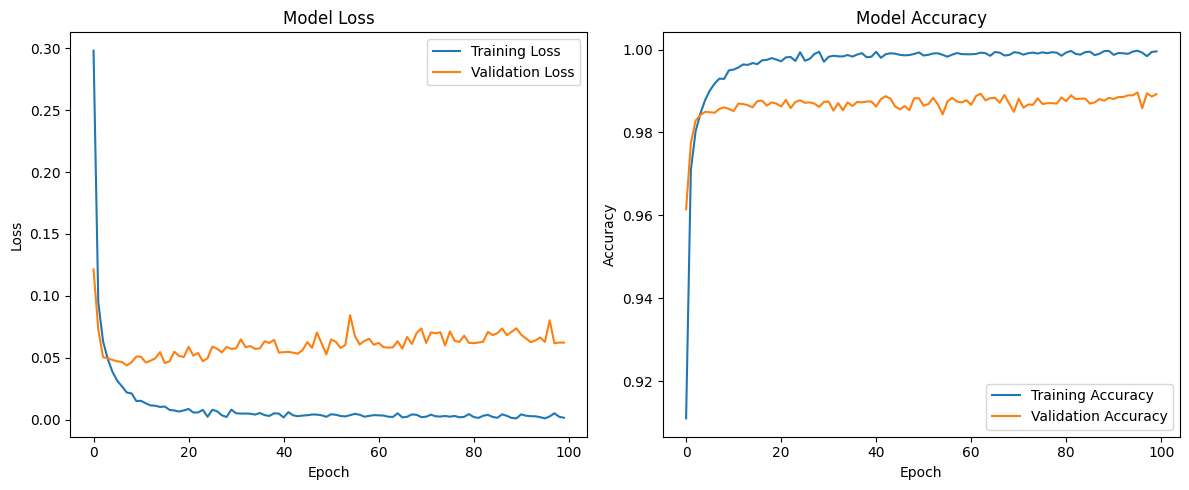

In [ ]:
import matplotlib.pyplot as plt

# Treningdagi va validatsiyadagi yo'qotish (loss) qiymatlarini chizish
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(trainer.history['loss'], label='Training Loss')
plt.plot(trainer.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Treningdagi va validatsiyadagi aniqlik (accuracy) qiymatlarini chizish
plt.subplot(1, 2, 2)
plt.plot(trainer.history['acc'], label='Training Accuracy')
plt.plot(trainer.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()